In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.DataFrame({'key': ['A','B','C','A','B','C'],
                   'data_math': [100,80,50,95,95,60],
                   'data_sport': [85,70,95,70,95,100]})
df.head()

,key,data_math,data_sport
0,A,100,85
1,B,80,70
2,C,50,95
3,A,95,70
4,B,95,95


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
key           6 non-null object
data_math     6 non-null int64
data_sport    6 non-null int64
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
data_math,6.0,80.000000,20.736441,50.0,65.00,87.5,95.0,100.0
data_sport,6.0,85.833333,13.197222,70.0,73.75,90.0,95.0,100.0


In [6]:
df.isna().sum(axis=0)

key           0
data_math     0
data_sport    0
dtype: int64

In [8]:
df.groupby('key').agg([min, np.mean, max])

data_math            data_sport           
          min  mean  max        min  mean  max
key                                           
A          95  97.5  100         70  77.5   85
B          80  87.5   95         70  82.5   95
C          50  55.0   60         95  97.5  100

In [9]:
df.groupby('key')['data_math'].mean()

key
A    97.5
B    87.5
C    55.0
Name: data_math, dtype: float64

### Conclusions

The stupider you are, the higher the chances of success in sports)

In [10]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [11]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [12]:
planets.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [13]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [15]:
planets.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [16]:
planets.isna().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [19]:
planets.method.nunique()

10

In [20]:
planets.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [17]:
planets.method.value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [18]:
planets.number.value_counts()

1    595
2    259
3     88
4     32
5     30
6     24
7      7
Name: number, dtype: int64

In [29]:
planets.groupby('method')['orbital_period'].agg(['mean', 'median']).round(2)

,mean,median
method,,
Astrometry,631.18,631.18
Eclipse Timing Variations,4751.64,4343.50
Imaging,118247.74,27500.00
Microlensing,3153.57,3300.00
Orbital Brightness Modulation,0.71,0.34
Pulsar Timing,7343.02,66.54
Pulsation Timing Variations,1170.00,1170.00
Radial Velocity,823.35,360.20
Transit,21.10,5.71


In [31]:
temp = planets.groupby('method')['orbital_period'].aggregate(['mean', 'median']).round(2)

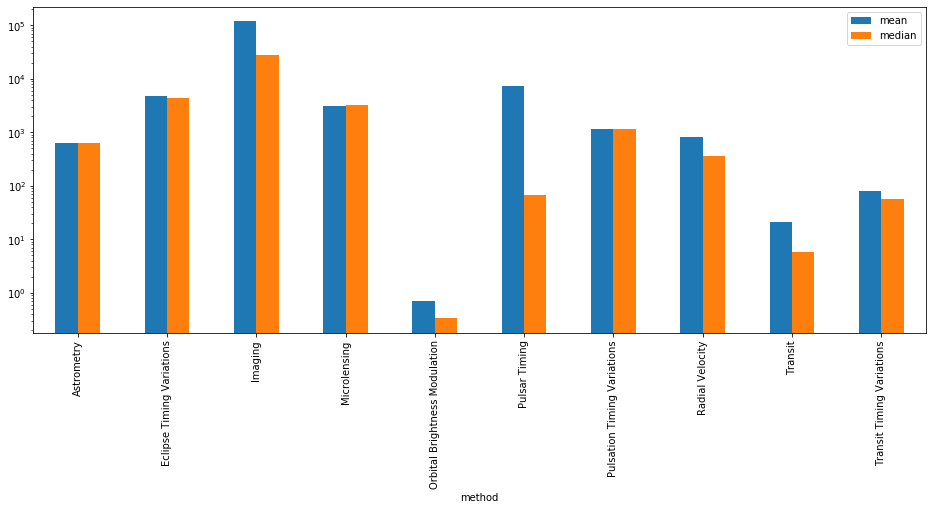

In [36]:
temp.plot(kind='bar', figsize=(16,6))
plt.yscale('log')

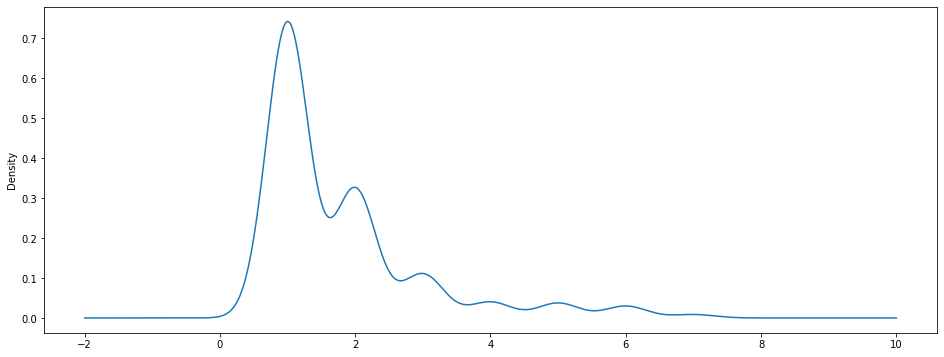

In [39]:
planets.number.plot(kind='kde', figsize=(16,6))

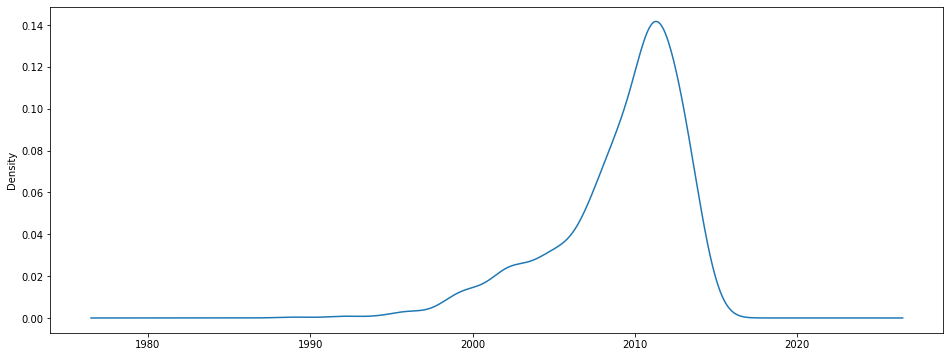

In [40]:
planets.year.plot(kind='kde', figsize=(16,6))

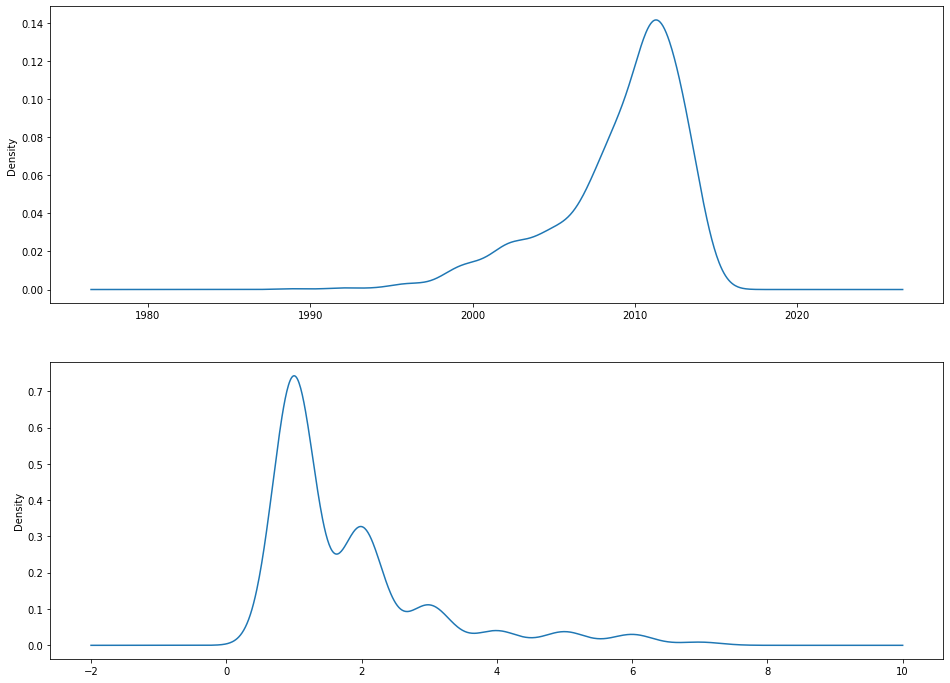

In [41]:
fig, ax = plt.subplots(2,1, figsize=(16,12))
planets.year.plot(ax=ax[0], kind='kde')
planets.number.plot(ax=ax[1], kind='kde')
plt.show()

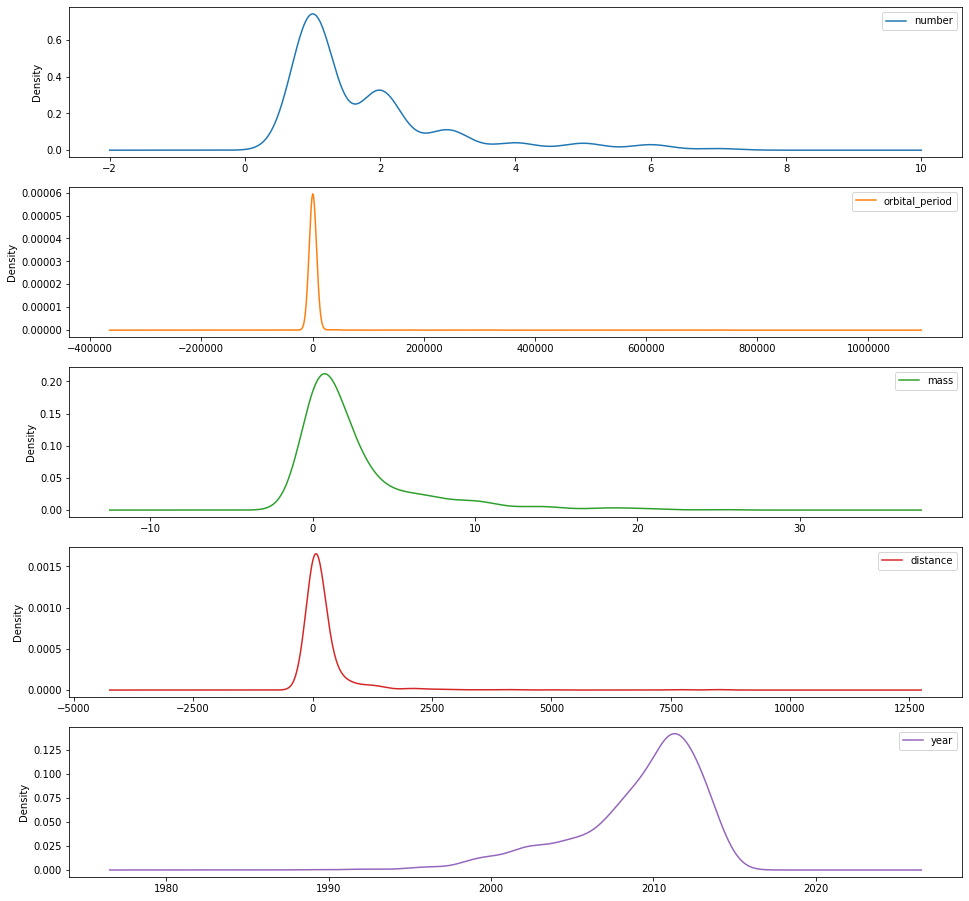

In [44]:
planets.plot(kind='kde', subplots=True, sharex=False, figsize=(16,16))
plt.show()

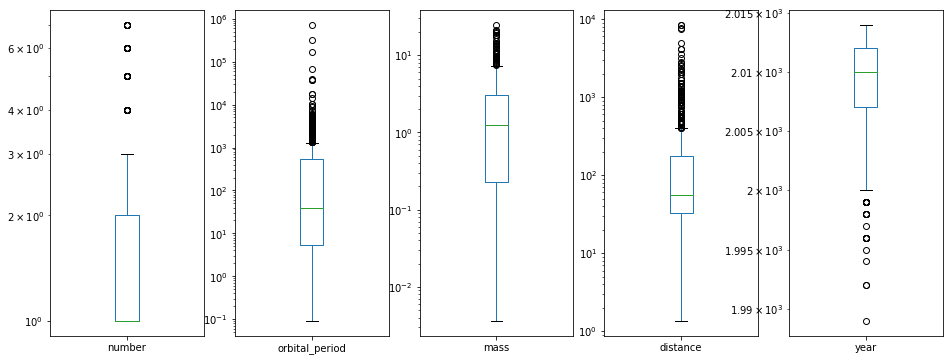

In [49]:
planets.plot(kind='box', subplots=True, sharex=False, figsize=(16,6), logy=True)
plt.show()

In [52]:
planets.groupby('method').agg({'orbital_period':'median', 'mass':['mean', 'max']})

orbital_period      mass       
                                      median      mean    max
method                                                       
Astrometry                        631.180000       NaN    NaN
Eclipse Timing Variations        4343.500000  5.125000   6.05
Imaging                         27500.000000       NaN    NaN
Microlensing                     3300.000000       NaN    NaN
Orbital Brightness Modulation       0.342887       NaN    NaN
Pulsar Timing                      66.541900       NaN    NaN
Pulsation Timing Variations      1170.000000       NaN    NaN
Radial Velocity                   360.200000  2.630699  25.00
Transit                             5.714932  1.470000   1.47
Transit Timing Variations          57.011000       NaN    NaN

## Filtering

In [54]:
def filter_func(x):
    return x['orbital_period'].mean() > 100

filtered = planets.groupby('method').filter(filter_func)
filtered.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Transformation

In [57]:
transformed = planets.groupby('method').transform(lambda x: (x - x.mean()) / x.std())
transformed.head()

,number,orbital_period,mass,distance,year
0,-0.623536,-0.380813,1.168175,0.566289,-0.357489
1,-0.623536,0.035342,-0.109961,0.117425,0.113205
2,-0.623536,-0.041483,-0.008024,-0.697117,0.819245
3,-0.623536,-0.341821,4.383120,1.295448,-0.122142
4,-0.623536,-0.211100,2.056859,1.489700,0.348551


## Apply

In [58]:
def norm_by_distance(x):
    x['orbital_period'] /= x['distance'].mean()
    return x


normalized = planets.groupby('method').apply(norm_by_distance)
normalized.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,5.218971,7.10,77.40,2006
1,Radial Velocity,1,16.952916,2.21,56.95,2008
2,Radial Velocity,1,14.786762,2.60,19.84,2011
3,Radial Velocity,1,6.318385,19.40,110.62,2007
4,Radial Velocity,1,10.004223,10.50,119.47,2009
5,Radial Velocity,1,3.601536,4.80,76.39,2008
6,Radial Velocity,1,34.368079,4.64,18.15,2002
7,Radial Velocity,1,15.474744,NaN,21.41,1996
8,Radial Velocity,1,19.249923,10.30,73.10,2008
9,Radial Velocity,2,8.775159,1.99,74.79,2010


In [59]:
planets.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


## Split Key

In [62]:
planets.groupby(['method','year'])['orbital_period'].mean().head(10)

method                     year
Astrometry                 2010      1016.000000
                           2013       246.360000
Eclipse Timing Variations  2008      4544.000000
                           2009     10220.000000
                           2010      4228.525000
                           2011      3552.083333
                           2012      4343.500000
Imaging                    2004              NaN
                           2005              NaN
                           2006    730000.000000
Name: orbital_period, dtype: float64

In [68]:
mapping = {1: 'aaa', 2: 'bbb', 1:'aaa'}
planets.groupby(mapping).mean()

,number,orbital_period,mass,distance,year
aaa,1,874.774,2.21,56.95,2008
bbb,1,763.000,2.60,19.84,2011


In [81]:
decades = lambda x: x['year']  // 10 * 10
# planets.set_index('method').groupby(decades).count()

In [84]:
pdf = planets.copy()

In [95]:
pdf['decade'] = pdf['year'] // 10 * 10
pdf.head()

,method,number,orbital_period,mass,distance,year,decade
0,Radial Velocity,1,269.300,7.10,77.40,2006,2000
1,Radial Velocity,1,874.774,2.21,56.95,2008,2000
2,Radial Velocity,1,763.000,2.60,19.84,2011,2010
3,Radial Velocity,1,326.030,19.40,110.62,2007,2000
4,Radial Velocity,1,516.220,10.50,119.47,2009,2000


In [99]:
res = pdf.groupby(['method', 'decade'])['number'].sum()
res.reset_index()

,method,decade,number
0,Astrometry,2010,2
1,Eclipse Timing Variations,2000,5
2,Eclipse Timing Variations,2010,10
3,Imaging,2000,29
4,Imaging,2010,21
5,Microlensing,2000,12
6,Microlensing,2010,15
7,Orbital Brightness Modulation,2010,5
8,Pulsar Timing,1990,9
9,Pulsar Timing,2000,1


In [100]:
pd.pivot_table(res.reset_index(), columns='decade', index='method', values='number', aggfunc='sum').fillna(0)

decade,1980,1990,2000,2010
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0
